<a href="https://colab.research.google.com/github/Alisia-Phini/OIBSIP/blob/main/Sales_Prediction_Oasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SALES PREDICTION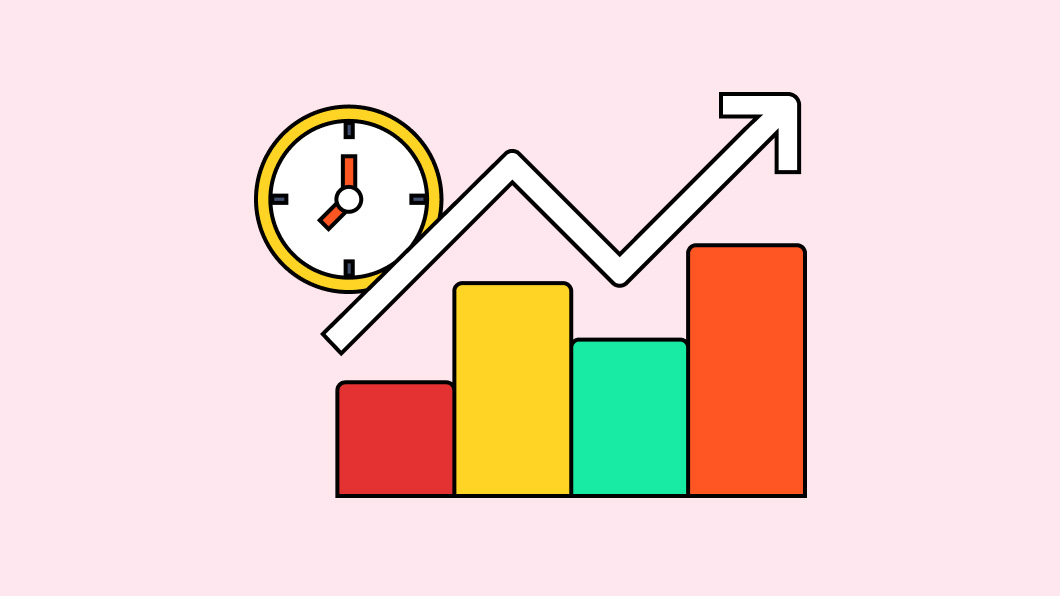

Sales prediction with Python enables businesses to forecast future sales based on factors like advertising expenses, customer segmentation, and marketing platforms. Leveraging machine learning techniques, companies can analyze historical data, build predictive models, and make data-driven decisions to optimize marketing strategies, allocate resources efficiently, and maximize revenue potential. By continuously updating the models with new data, businesses can adapt to market dynamics and achieve better performance in a competitive environment.

This dataset contains 200 rows and 5 columns.Here our aim is to predict the sales basesd on the given inputs.

**Import the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [ ]:
df=pd.read_csv('/content/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Data Exploration**

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<Axes: xlabel='TV', ylabel='Sales'>

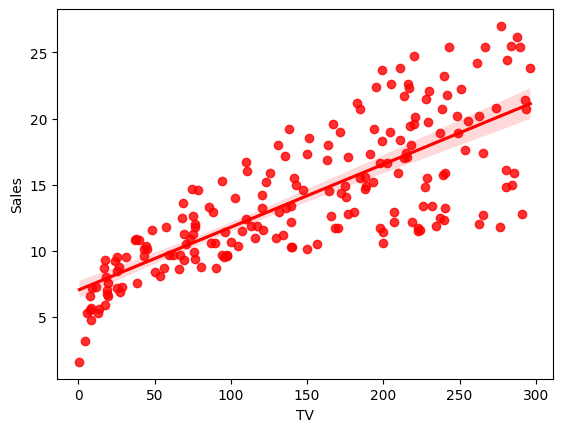

In [ ]:
sns.regplot(x=df['TV'],y=df['Sales'],color='r')

<Axes: xlabel='Radio', ylabel='Sales'>

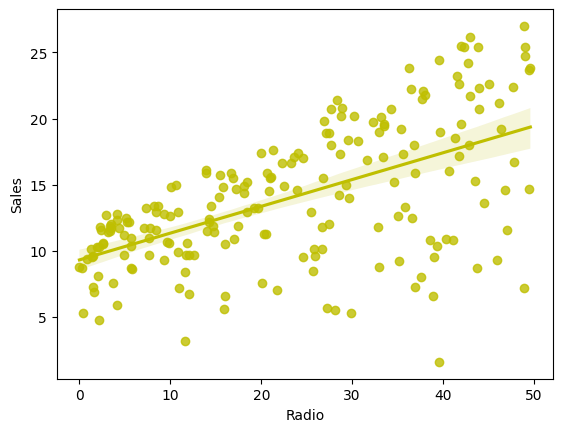

In [ ]:
sns.regplot(x=df['Radio'],y=df['Sales'],color='y')

<Axes: xlabel='Newspaper', ylabel='Sales'>

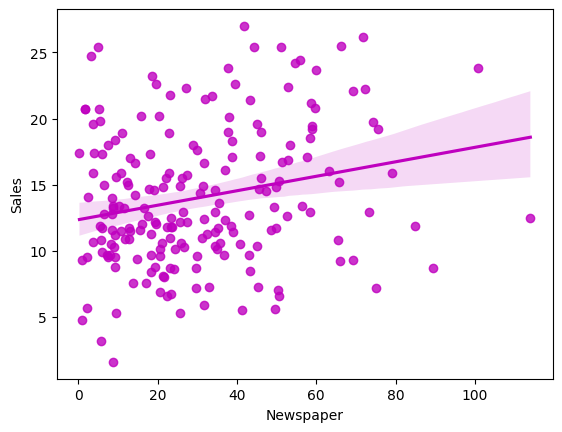

In [ ]:
sns.regplot(x=df['Newspaper'],y=df['Sales'],color='m')

<Axes: >

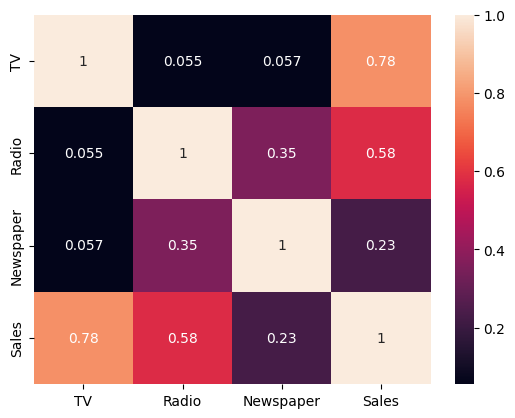

In [ ]:
sns.heatmap(df.corr(),annot=True)

**Separating x  and y**

In [ ]:
x=df.drop(['Sales'],axis=1)
y=df['Sales']


**Splitting training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**Performing Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

**Model Creation**

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.9489591 , 22.37455048, 22.79211282, 12.44480854, 23.39042071,
       14.83197855, 22.41429453,  9.11687693, 14.88087711, 16.59840646,
       10.70062224,  8.32770263, 15.81930785, 10.63623577, 11.17830817,
       13.62036299, 10.56405044, 17.60788591, 11.9306182 , 20.08370877,
       21.03046413, 15.18558856, 14.01570051, 22.72927318,  9.38736665,
        7.46119419, 22.14157907, 13.42736996, 10.7854383 , 10.20855266,
       13.812931  , 11.62479347, 22.88839367, 14.21798925, 19.50138949,
       21.37526272, 15.70694939, 22.18444764, 12.49460149,  6.27235101,
       11.2187167 , 14.02545825, 11.78783597,  9.83068029, 14.77398255,
        7.0867009 , 10.96270525, 15.60561131, 10.41942346, 13.24301495,
       17.09725145, 13.27873206, 14.77071021, 12.69001793,  8.17105955,
       11.45876216, 11.10759395, 25.36076159,  9.42598722, 13.79984117])

**Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
print("r2 score is",r2_score(y_test,y_pred))

r2 score is 0.7725767303950063


In [ ]:
print("MAE is",mean_absolute_error(y_test,y_pred))

MAE is 1.767705033141996


In [ ]:
print("MAPE is",mean_absolute_percentage_error(y_test,y_pred))

MAPE is 0.19136628946163947
